In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [63]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [64]:
data.select_dtypes(include=['object']).nunique()

Gender    2
dtype: int64

In [65]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [67]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test= sc_x.fit_transform(x_test)


In [68]:
from sklearn.svm import SVC
sv_classifier=SVC(kernel='linear',random_state=0)
sv_classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [69]:
y_pred=sv_classifier.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [71]:
accuracy

0.85

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
parameters = [
    {'C':[1,10,100,3,5],'kernel':['linear']},
    {'C':[1,30,10,7,9],'kernel':['rbf'],
     'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
]

In [74]:
grid_search = GridSearchCV(estimator=sv_classifier,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [75]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,param_gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004243,0.001151,0.001935,0.000768,1,linear,NaN,"{'C': 1, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.800000,0.766667,0.900000,0.833333,0.830000,0.052599,50
1,0.005002,0.001420,0.001442,0.000168,10,linear,NaN,"{'C': 10, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
2,0.012954,0.001949,0.001378,0.000099,100,linear,NaN,"{'C': 100, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
3,0.003552,0.000876,0.001721,0.000520,3,linear,NaN,"{'C': 3, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
4,0.003112,0.000121,0.001298,0.000111,5,linear,NaN,"{'C': 5, 'kernel': 'linear'}",0.833333,0.8,...,0.900000,0.733333,0.866667,0.833333,0.766667,0.900000,0.833333,0.833333,0.051640,46
5,0.003544,0.001274,0.001546,0.000093,1,rbf,0.1,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.966667,0.9,...,0.966667,0.833333,0.900000,0.866667,0.766667,0.933333,0.833333,0.890000,0.061554,39
6,0.002792,0.000731,0.001876,0.000987,1,rbf,0.2,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",0.966667,0.9,...,0.966667,0.833333,0.900000,0.866667,0.766667,0.933333,0.866667,0.893333,0.059255,34
7,0.002600,0.000247,0.001686,0.000304,1,rbf,0.3,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",0.966667,0.9,...,1.000000,0.866667,0.900000,0.866667,0.800000,0.933333,0.866667,0.903333,0.054671,14
8,0.002555,0.000073,0.001499,0.000083,1,rbf,0.4,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}",0.966667,0.9,...,1.000000,0.866667,0.900000,0.866667,0.800000,0.933333,0.866667,0.903333,0.054671,14
9,0.002874,0.000412,0.001984,0.000791,1,rbf,0.5,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",0.966667,0.9,...,1.000000,0.866667,0.900000,0.866667,0.800000,0.933333,0.866667,0.903333,0.054671,14


In [78]:
grid_mean_scores =pd.DataFrame(grid_search.cv_results_)[['mean_test_score','std_test_score','params']]

In [80]:
print (grid_search.cv_results_['params'][0])
print (grid_search.cv_results_['mean_test_score'][0])
print (grid_search.cv_results_['std_test_score'][0])


{'C': 1, 'kernel': 'linear'}
0.8300000000000001
0.052599112793531674


In [84]:
accuracy=grid_search.best_score_
print(accuracy)
grid_search.best_params_

0.9100000000000001


{'C': 30, 'gamma': 0.2, 'kernel': 'rbf'}

In [85]:
grid_mean_scores = grid_search.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.83       0.83333333 0.83333333 0.83333333 0.83333333 0.89
 0.89333333 0.90333333 0.90333333 0.90333333 0.90333333 0.90333333
 0.90333333 0.90666667 0.90333333 0.91       0.90666667 0.90666667
 0.89666667 0.89666667 0.89666667 0.89       0.88333333 0.9
 0.90333333 0.91       0.91       0.90666667 0.90333333 0.89
 0.89       0.89333333 0.89666667 0.90333333 0.91       0.91
 0.91       0.90333333 0.9        0.89333333 0.89       0.89666667
 0.90333333 0.91       0.91       0.90666667 0.90333333 0.89333333
 0.89       0.89333333]


Text(0, 0.5, 'Cross-Validatted Accuracy')

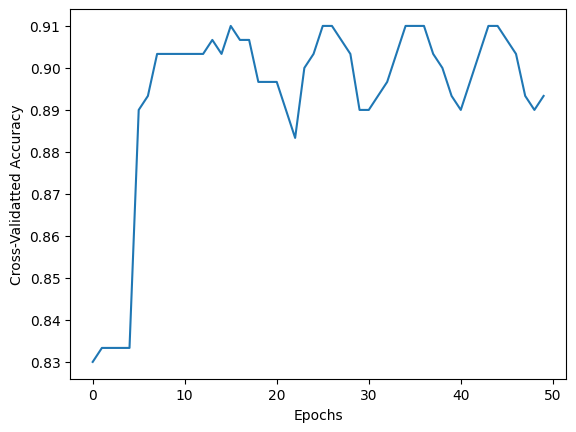

In [86]:
plt.plot(grid_mean_scores)
plt.xlabel('Epochs')
plt.ylabel('Cross-Validatted Accuracy')